In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math
import random

df = pd.read_csv("all-hands.dat")


(1a)

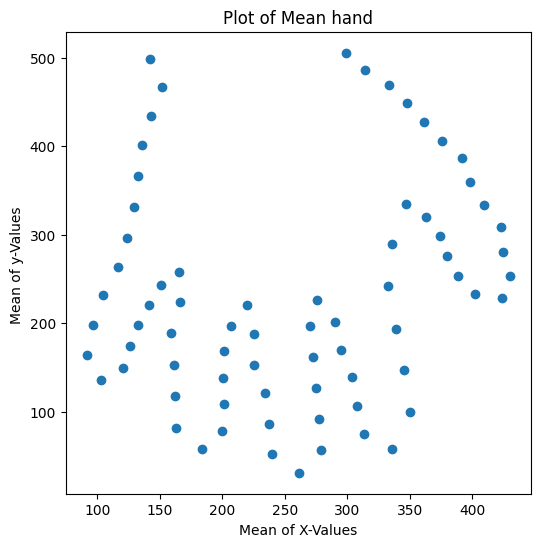

In [3]:
df_means = df.mean()




def plot_hand(meanss):
    X = []
    Y= []
    for index, value  in enumerate(meanss):
        if (index %2 ==0):  
            X.append(value)
        elif (index %2 ==1):
            Y.append(value)
    plt.figure(figsize=(6,6))
    plt.scatter(X,Y)
    plt.xlabel("Mean of X-Values")
    plt.ylabel("Mean of y-Values ")
    plt.title("Plot of Mean hand")
    plt.show()


plot_hand(df_means)
    

(1b) Calculating the Covariance Matrix

In [4]:
x_norm = df-df_means
n, d = df.shape
print(n,d)

def calculate_cov_matrix(n,xnorm):
    return ((np.transpose(xnorm)@ xnorm))/(n-1)
    

cov_matrix = calculate_cov_matrix(n,x_norm)
print(cov_matrix)

#Testing using NP functino
# print(np.cov(df,rowvar = False))


17 144
              296        509         305        481         329        465  \
296    582.808824  -3.775735  564.720588 -32.841912  572.338235 -36.680147   
509     -3.775735  32.257353   -3.768382  31.169118   -5.257353  24.488971   
305    564.720588  -3.768382  552.014706 -26.610294  558.518382 -28.566176   
481    -32.841912  31.169118  -26.610294  40.514706  -29.481618  38.746324   
329    572.338235  -5.257353  558.518382 -29.481618  568.007353 -29.301471   
...           ...        ...         ...        ...         ...        ...   
442     57.665441  52.095588   51.698529  38.198529   50.654412  18.669118   
153    584.522059  -1.283088  561.988971 -38.198529  571.220588 -45.481618   
477     50.191176  53.900735   43.029412  38.091912   42.599265  17.555147   
142.1  638.345588  -7.768382  615.827206 -43.672794  624.268382 -50.128676   
511     48.279412  53.893382   39.485294  35.547794   38.731618  13.128676   

              350        443         365        417  ...

(1c) 

In [5]:
# print(df)
x1_values = df.iloc[:,0] #1st column 
x2_values = df.iloc[:,2] #3rd column
x1_mean = x1_values.mean()
x2_mean= x2_values.mean()
x1_norm = x1_values-x1_mean
x2_norm = x2_values-x2_mean

def calc_cov(n,x1norm,x2norm):
    return (np.sum(x1norm@x2norm))/(n-1)



print("The Cov between X1 & X2 is:", calc_cov(n,x1_norm,x2_norm))

#cross validation using npfucniot top upper right and bottom left represent cov(a,b)
print("NP COV function:\n" , np.cov(x1_values,x2_values))


def calc_corr():
    return calc_cov(n,x1_norm,x2_norm)/(x1_values.std()*x2_values.std())

print("The correlation Between X1 & X2 is:" , calc_corr())



The Cov between X1 & X2 is: 564.7205882352941
NP COV function:
 [[582.80882353 564.72058824]
 [564.72058824 552.01470588]]
The correlation Between X1 & X2 is: 0.995623728078799


The correlation of .99 indicated that X1 and X2 have a strong positive correlation meaning that these poitns dispaly a strong linear relationship. Because the points are adjacent to each other, they have very similar have very similar behaviors which backups the extremely high correlation value because these poitns are nearly the same 

(1d) Calculating the PCA

In [6]:
#I realized a lot of this is unnescensarcy since np sorts eigenvalues in descignin order but included it just incases they were not
def calculate_PCA(cov_matrix, n):

    evalues, evectors = np.linalg.eig(cov_matrix)

    index = np.argsort(evalues)[::-1]


    evalues = evalues[index]
    evectors = evectors[:, index]

    evalues = evalues[:n]
    evectors = evectors[:,:n]

    return evalues, evectors

# Assuming cov_matrix is already defined and x_norm is your normalized data matrix

e_values, p_components = calculate_PCA(cov_matrix, 144)
# print(p_components)


(1e) Scree Plot of Eigenvalues

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([<matplotlib.axis.XTick at 0x15ae78ef0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

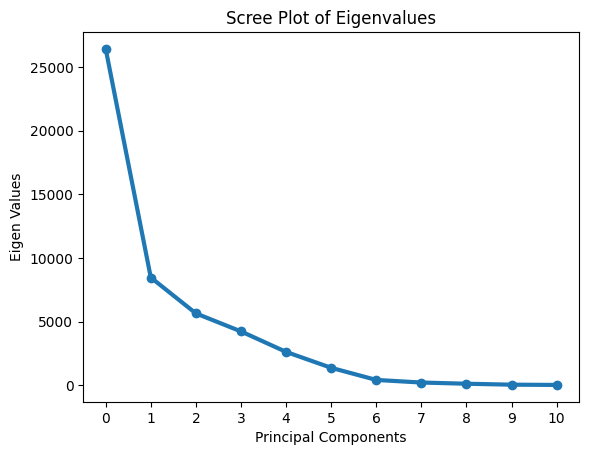

In [7]:
scree_evalues,moreevectors = calculate_PCA(cov_matrix,11)



plt.plot(scree_evalues,'o-',linewidth = 3)
plt.xlabel("Principal Components")
plt.ylabel("Eigen Values")
plt.title("Scree Plot of Eigenvalues")
plt.xticks(range(len(scree_evalues)))


Looking at the scree plot it seems that around 7 of the principal components are non-zero this tells us that that we need a minimum of 7 principal components to hold the integrity of the data and the number of princiapl components you need to show the menaingful variance in the data.

(1f)

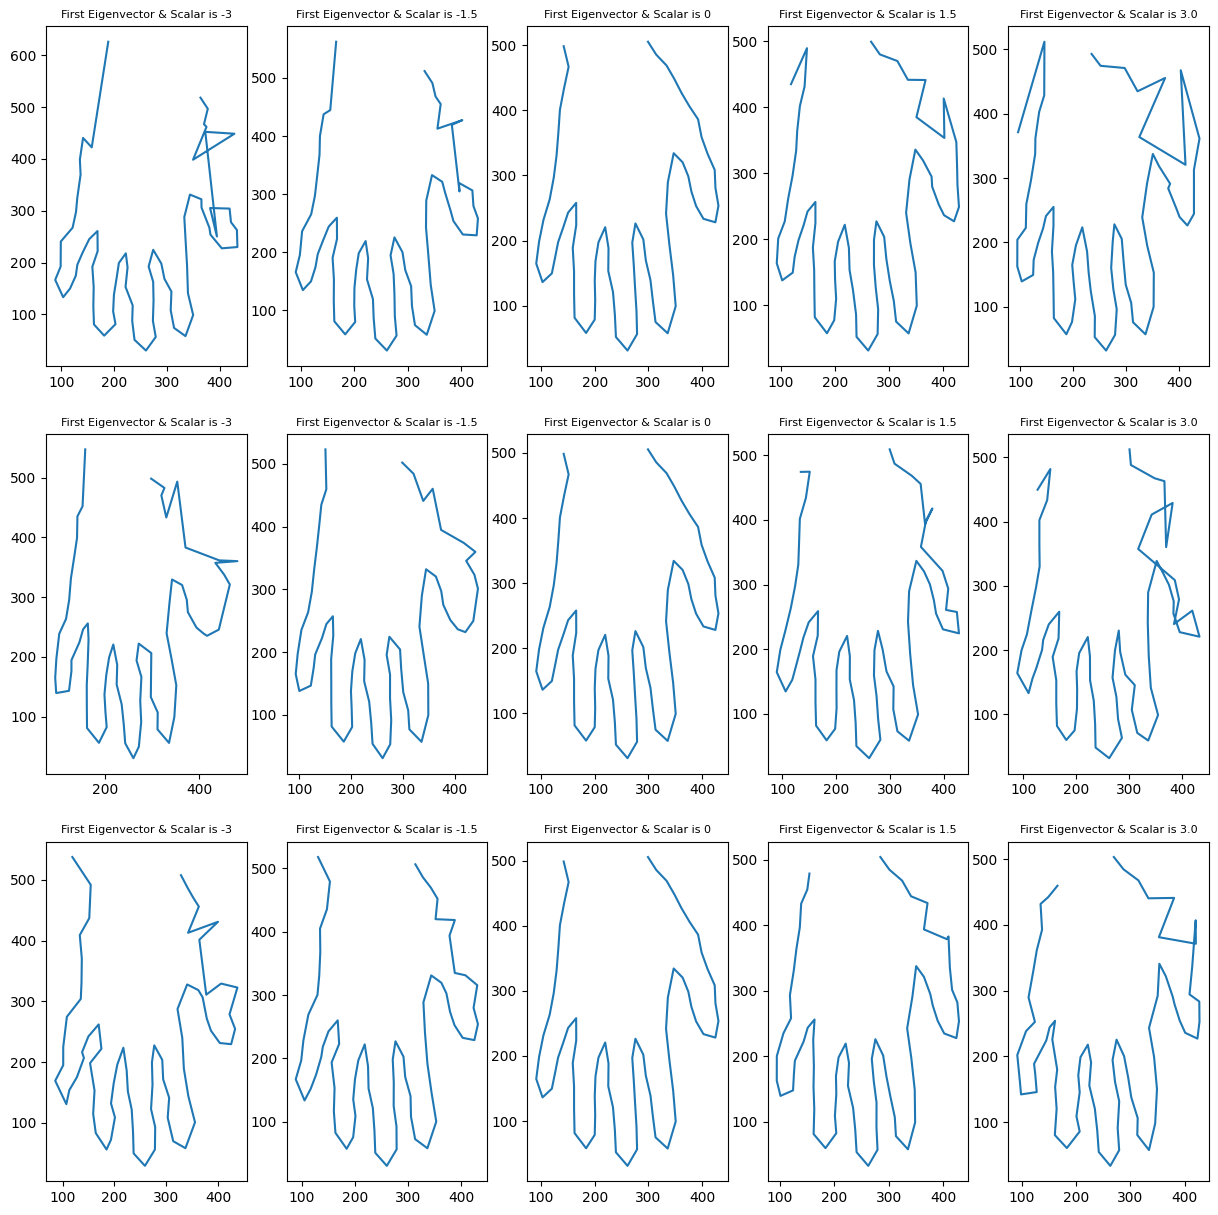

In [8]:
first_evalue = e_values[0]
first_evector = p_components[0]
second_evalue = e_values[1]
second_evector = p_components[1]
third_evalue = e_values[2]
third_evector = p_components[2]


#sqrt(first eigenvalue)



# Assuming the following variables are defined correctly:
# e_values, p_components, df_means

s_factors = [-3, -1.5, 0, 1.5, 3.0]

fig, axes = plt.subplots(3, 5, figsize=(15, 15))

for col, s in enumerate(s_factors):
    X1, Y1 = [], []
    X2, Y2 = [], []
    X3, Y3 = [], []

    hand1 = df_means + s * np.sqrt(first_evalue) * first_evector
    hand2 = df_means + s * np.sqrt(second_evalue) * second_evector
    hand3 = df_means + s * np.sqrt(third_evalue) * third_evector
    for index, value in enumerate(hand1):
        if index % 2 == 0:
            X1.append(value)
        else:
            Y1.append(value)
    axes[0, col].plot(X1, Y1)
    axes[0, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[0, col].title.set_size(8)

    for index, value in enumerate(hand2):
        if index % 2 == 0:
            X2.append(value)
        else:
            Y2.append(value)
    axes[1, col].plot(X2, Y2)
    axes[1, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[1, col].title.set_size(8)

    for index, value in enumerate(hand3):
        if index % 2 == 0:
            X3.append(value)
        else:
            Y3.append(value)
    axes[2, col].plot(X3, Y3)
    axes[2, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[2, col].title.set_size(8)







The dimension in the data represents corresponds to more variation in the data, as we can see from the graphs as the scalar multiples increase the data grew more and more dispere with wider fingers, and more erratic points, unable to caputre the full esscenve of a hand.

(1g)

([<matplotlib.axis.XTick at 0x15bc99130>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

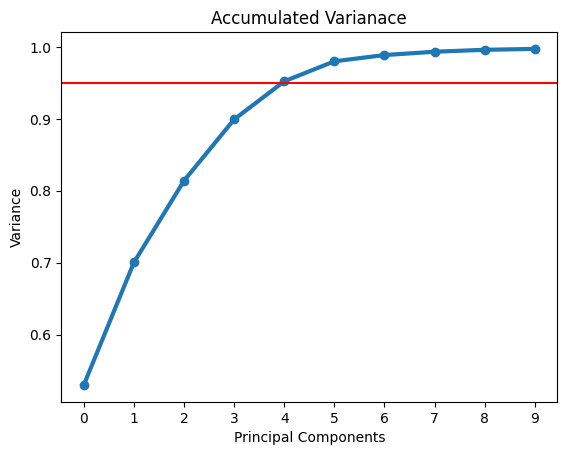

In [9]:
# p = variance of k principal components/ total variance

#where n is the number of principal components on the graph
def calc_cum_variance(n):
    X_PC = []
    np.array(e_values) #converts to np.array so that we can get first n elements
    total_variance = np.sum(e_values)#denominator
    for i in range(1,n+1):
        p = np.sum(e_values[:i])/total_variance
        X_PC.append(p)
    
    return(np.asarray(X_PC))





components = calc_cum_variance(10)

plt.plot(components,'o-',linewidth = 3)
plt.axhline(y=0.95,color = 'r')
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.title("Accumulated Varianace")
plt.xticks(range(len(components)))











You would need a minimum of 4 dimensions or princiapl components to represnet 95% of the variance in hand data as you can see by the graph above.

(1h)

                    0                     1                     2  \
0 -2.507384+0.000000j  75.604369+ 0.000000j  59.495922+ 0.000000j   

                    3  
0 -56.23667+ 0.00000j  
<class 'pandas.core.frame.DataFrame'>


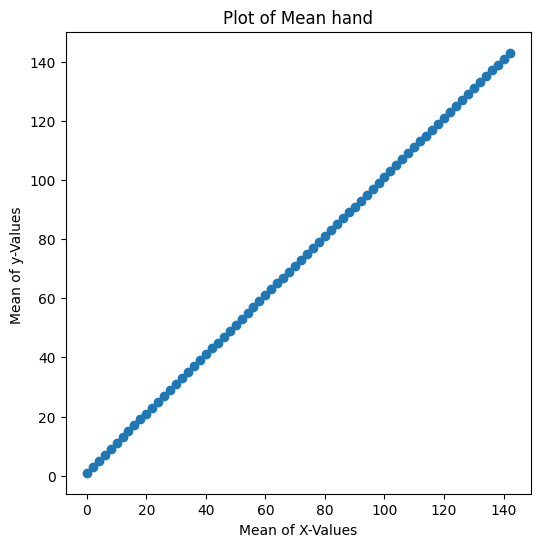

In [10]:
#Z=XV where V is princiapl component matrix, and Z is loadings

fourevalues, fourevectors = calculate_PCA(cov_matrix,4)



Z = x_norm @ fourevectors # where Z is the principal vecotr matrix 
# print(Z)
first_hand_weights = Z[:1]
print(first_hand_weights)


print(type(Z))


first_observation_recon  = Z @ np.transpose(fourevectors)

plot_hand(first_observation_recon[:30])



The Rows in z represent the different weights

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


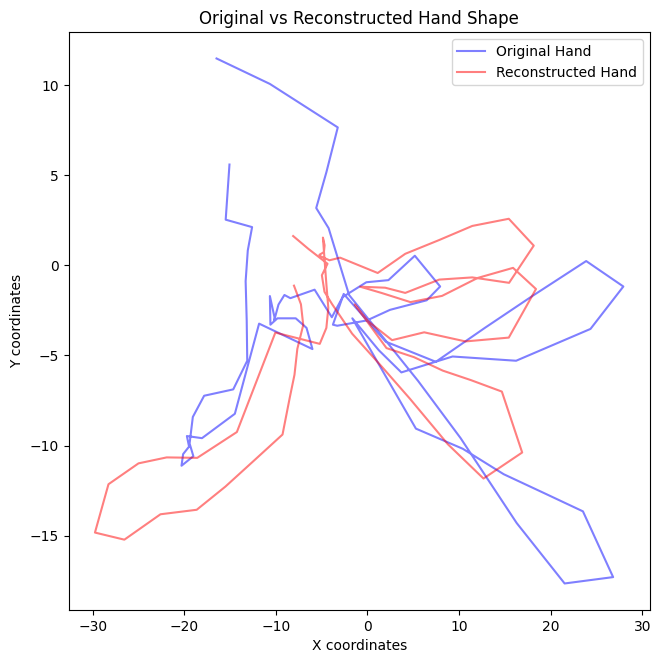

In [11]:
#Needed some help from chatgpt for reshaping the hands and plotting
four_eigenvalues, four_eigenvectors = calculate_PCA(cov_matrix, 4)



four_eigenvectors 

Z = np.asarray(x_norm @ four_eigenvectors)


first_hand_weights = Z[0, :]

# Ensure first_hand_weights is a NumPy array

# To reconstruct the first hand shape from the weights
first_hand_reconstructed = first_hand_weights @ np.transpose(four_eigenvectors)


first_hand_original = x_norm.iloc[0].to_numpy().reshape(-1, 2)
first_hand_recon_reshaped = first_hand_reconstructed.reshape(-1, 2)

# Plotting the original and reconstructed hand shape
plt.figure(figsize=(7.5, 7.5))
plt.plot(first_hand_original[:, 0], first_hand_original[:, 1], color='blue', alpha=0.5, label='Original Hand')
plt.plot(first_hand_recon_reshaped[:, 0], first_hand_recon_reshaped[:, 1], color='red', alpha=0.5, label='Reconstructed Hand')
plt.legend()
plt.title('Original vs Reconstructed Hand Shape')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.show()


(2a) I scaled the x values(the hippo vols) using theforula in the scale data funcition and the I created Xmatrix which i used np.hstack to add a column of 1s to represent the bias/interecept.

In [72]:
Oasis = pd.read_csv("OASIS-hippocampus.csv")
Oasis = Oasis[["RightHippoVol", "LeftHippoVol", "Dementia", "TrainData"]]# subsetted data


train_data = Oasis[Oasis["TrainData"] == 0]
test_data = Oasis[Oasis["TrainData"] == 1]


# print(train_data)
# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# train_data["RightHippoVol"] = train_data["RightHippoVol"].astype(float).apply(lambda x: sigmoid(x))
# train_data["LeftHippoVol"] = train_data["LeftHippoVol"].astype(float).apply(lambda x: sigmoid(x))


#scales the data betwee 0 and 1 
def scale_data(x):
    x_min = np.min(x)
    x_max = np.max(x)
    
    return (x-x_min)/(x_max-x_min)

right_scaled= scale_data(train_data["RightHippoVol"])
left_scaled = scale_data(train_data["LeftHippoVol"])

Scaled_df = pd.DataFrame({
    "RightHippo": right_scaled,
    "LeftHippo": left_scaled,
})
Xmatrix = np.hstack([np.ones((Scaled_df.shape[0], 1)), Scaled_df.to_numpy()])
print(Xmatrix)


[[1.         0.79064395 0.67472347]
 [1.         0.38694773 0.17124129]
 [1.         0.71787468 0.78656288]
 [1.         0.59630378 0.54690701]
 [1.         0.55703148 0.39287177]
 [1.         0.86745596 0.86972552]
 [1.         0.65492348 0.41253585]
 [1.         0.59630378 0.50553052]
 [1.         0.64192896 0.35190496]
 [1.         0.50996246 0.57599345]
 [1.         0.49812301 0.        ]
 [1.         0.66156512 0.56329373]
 [1.         0.56598325 0.38508808]
 [1.         0.71527577 0.51044654]
 [1.         0.56540572 0.15649324]
 [1.         0.63355472 0.47644408]
 [1.         0.74704014 0.40106514]
 [1.         0.56222928 0.10405571]
 [1.         0.55529887 0.42974191]
 [1.         0.82269708 0.7734535 ]
 [1.         0.34074502 0.19827939]
 [1.         0.93127346 0.80704629]
 [1.         0.88766965 0.93035641]
 [1.         0.91712388 1.        ]
 [1.         0.33265954 0.18885703]
 [1.         0.70516893 0.55059402]
 [1.         0.65434594 0.57804179]
 [1.         0.82529599 0.85

In [79]:
######This is my main implementatino of the Logistic Regressino Fucntion #######

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def negllh(X, y, beta):
    a = sigmoid(np.dot(X, beta))
    b = -y * np.log(a) - (1 - y) * np.log(1 - a)
    return np.sum(b) / len(y)

def gradient_descent(X, y, beta, lr, niterations):
    neg_log_llh = []

    for _ in range(niterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(np.transpose(X), (predictions - y)) / len(y)
        beta -= lr * gradient
        neg_log_llh.append(negllh(X, y, beta))

    return beta, neg_log_llh, gradient

def logistic_regression(X, y, lr, n):
    beta = np.zeros(X.shape[1])  
    return gradient_descent(X, y, beta, lr, n)

beta, llhs, gradient = logistic_regression(Xmatrix,train_data["Dementia"],0.08,10000)
print(beta)
print(gradient)


[ 3.07066648 -4.34728912 -1.63496146]
[-0.00070122  0.00216517 -0.00127901]


(2b) I started with a value of 0.01 the graph decreased but never really seemed to flatten,so increase it and a learningrate/stepsize of 0.08 was the learning rate that I decided on because it the values dont decrease too quickly but eventually flatten too.

(2c)

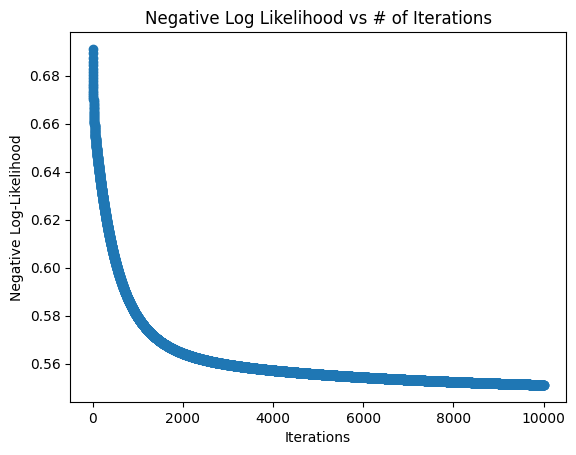

In [81]:
plt.plot(llhs, 'o-', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelihood")
plt.title("Negative Log Likelihood vs # of Iterations")
plt.show()

(2d)